In [5]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=DeprecationWarning)

## Review (grouping)

- conducted at https://pollev.com/jeremysanchez

In [6]:
nba_salaries = Table.read_table('nba_salaries.csv')
nba_salaries

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000
4,Juwan Howard,PF,Washington Wizards,15000000,2000
5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
6,Karl Malone,PF,Utah Jazz,14000000,2000
7,Larry Johnson,F,New York Knicks,11910000,2000
8,Gary Payton,PG,Seattle SuperSonics,11020000,2000
9,Rasheed Wallace,PF,Portland Trail Blazers,10800000,2000
10,Shawn Kemp,C,Cleveland Cavaliers,10780000,2000


In [7]:
nba_2020 = nba_salaries.where('season', 2020)
nba_2020

rank,name,position,team,salary,season
1,Stephen Curry,PG,Golden State Warriors,40231758,2020
2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
3,Russell Westbrook,PG,Houston Rockets,38506482,2020
4,John Wall,PG,Washington Wizards,38199000,2020
5,Kevin Durant,SF,Brooklyn Nets,38199000,2020
6,James Harden,SG,Houston Rockets,38199000,2020
7,LeBron James,SF,Los Angeles Lakers,37436858,2020
8,Kyle Lowry,PG,Toronto Raptors,34996296,2020
9,Blake Griffin,PF,Detroit Pistons,34449964,2020
10,Tobias Harris,SF,Philadelphia 76ers,32742000,2020


In [22]:
nba_2020.group('position',np.average).sort('salary average', descending=True)

position,rank average,name average,team average,salary average,season average
PG,230.585,,,9.44018e+06,2020
C,226.145,,,8.51344e+06,2020
SF,262.809,,,7.67178e+06,2020
PF,259.933,,,7.13819e+06,2020
SG,278.148,,,6.64896e+06,2020
F,305.4,,,4.55763e+06,2020
G,371,,,2.84069e+06,2020


## New material

### Cross-classify with **two-group columns**

In [8]:
cones = Table.read_table("cones.csv")
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [9]:
cones.group(['Flavor','Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [10]:
cones.group(['Flavor','Color'], np.average)

Flavor,Color,Price average
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


### Cross-classify with **pivoting**

In [11]:
cones.pivot('Flavor','Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [12]:
cones.pivot('Flavor','Color','Price',np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


_______

### Know when to use grouping vs. pivoting!

In [13]:
# https://corgis-edu.github.io/corgis/csv/skyscrapers/
skyscrapers = Table.read_table('skyscrapers.csv')
skyscrapers.show(6)

name,material,city,height,completed
One World Trade Center,mixed/composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,mixed/composite,New York City,365.8,2009


#### **Task:** 
- For each city, find the tallest building per material, as of 2016.

In [14]:
skyscrapers.select('material', 'city', 
                   'height').group(['city', 'material'], max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


#### **Task:** 
- For each city, find the height difference between the tallest steel building and the tallest concrete building.

In [39]:
skyscrapers.select('material', 'city', 
                   'height').group(['city', 'material'], max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


In [33]:
skyscrapers_pivoted = skyscrapers.pivot('material', 'city', 
                                        values='height', collect=max)
skyscrapers_pivoted

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


In [16]:
skyscrapers_pivoted = skyscrapers_pivoted.with_column(
    'difference', 
    abs(skyscrapers_pivoted.column('steel') - 
        skyscrapers_pivoted.column('concrete'))
)

In [17]:
skyscrapers_pivoted

city,concrete,mixed/composite,steel,difference
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25
Chicago,423.22,306.94,442.14,18.92
Cincinnati,125,202.69,175,50
Cleveland,125,288.65,215.8,90.8
Columbus,79.25,0,169.3,90.05
Dallas,176.48,280.72,270.06,93.58


In [18]:
skyscrapers_pivoted.sort('difference', descending=True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


**Discussion Question**: I would like to make a visualization of the distribution of material types of buildings among each of San Francisco, New York and Chicago. Which cross-classification method is best for this? 
- *Hint:* Which cross classification method produces a table which can be used to create the plot?

<Figure size 2000x1000 with 0 Axes>

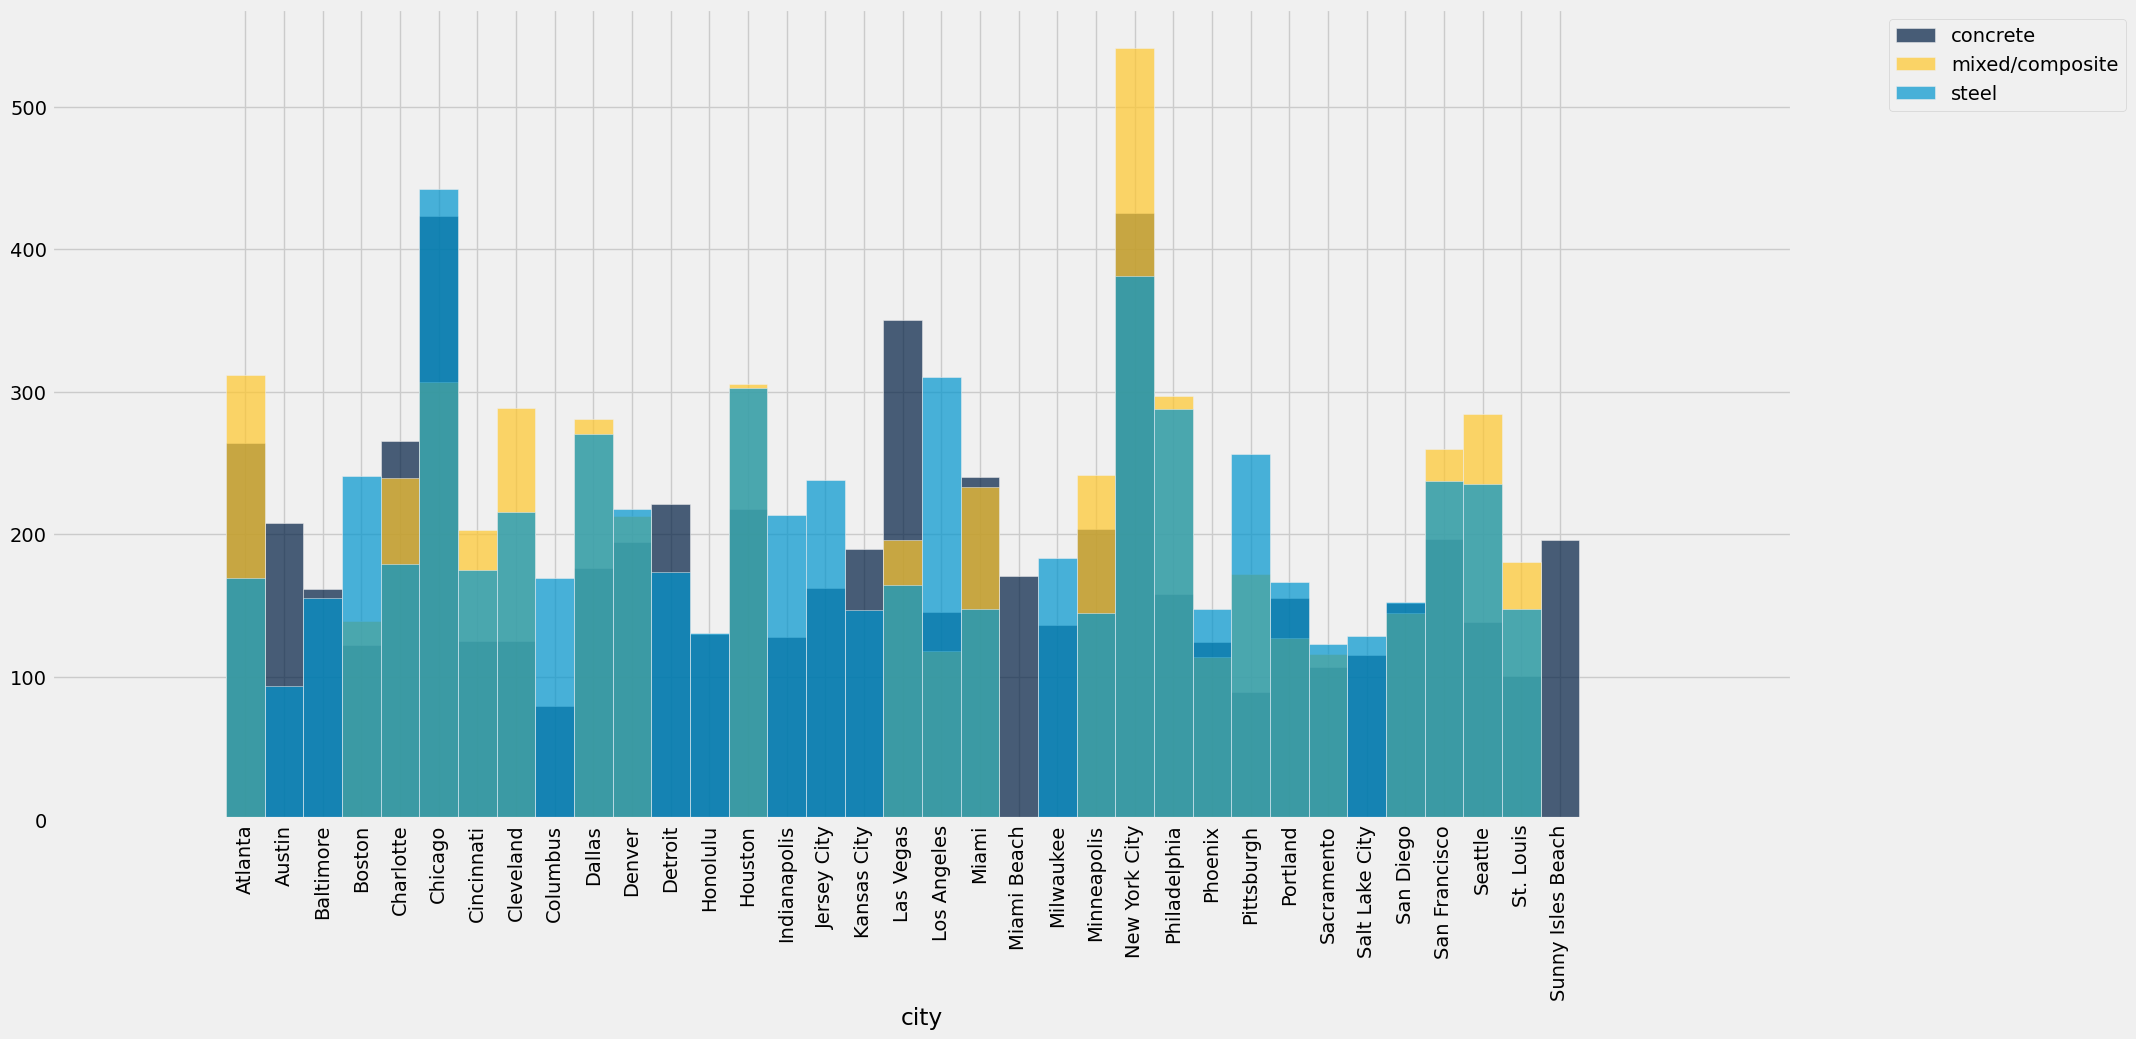

In [67]:
plots.figure(figsize=(20,10))
skyscrapers_pivoted.bar('city', width=20, height=10)
plots.xticks(ticks=range(0, len(skyscrapers_pivoted.column('city'))),  # 每隔3个显示一个
           labels=skyscrapers_pivoted.column('city'), rotation=90)
plots.show()

_______

### Combine information in different tables via **joining**

In [42]:
drinks = Table().with_columns("Drink", make_array('Milk Tea', 'Espresso', 'Latte','Espresso'),
                              "Cafe", make_array('Asha','Strada','Strada','FSM'),
                              "Price", make_array(5.5,1.75,3.25,2))
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [43]:
discounts = Table().with_columns("Coupon", make_array('10%','25%','5%'),
                                "Location",make_array('Asha','Strada','Asha'))
discounts

Coupon,Location
10%,Asha
25%,Strada
5%,Asha


In [44]:
drinks.join('Cafe',discounts,'Location')

Cafe,Drink,Price,Coupon
Asha,Milk Tea,5.5,10%
Asha,Milk Tea,5.5,5%
Strada,Espresso,1.75,25%
Strada,Latte,3.25,25%


In [45]:
discounts.join('Location',drinks,'Cafe')

Location,Coupon,Drink,Price
Asha,10%,Milk Tea,5.5
Asha,5%,Milk Tea,5.5
Strada,25%,Espresso,1.75
Strada,25%,Latte,3.25
